#IN NETFLIX MOVIE PROJECT WE WILL BE THE PROBLEM STATEMENT IS TO PREDICT THE RATING OF THE USER WHEN HE HAS NO RATED. WE ARE PROVIDED WITH THE DATA OF MOVIE ID,USERID,RATING GIVEN AND DATE OF THE MOVIE.

##ASSIGNMENT :
##1.INSTEAD OF 10K USERS AND 1K MOVIES TRAIN THE MODEL WITH 25K USERS AND 3K MOVIES AND TRAIN THE MODELS .REPORT THE ROOT MEAN SQUATRE ERROR AND MEAN ABSOLUTE PERCENTAGE ERROR.
##2.TUNE THE PARAMETERS XGBOOST MODELS AND IMPROVE RMSE.

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 3.4MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1yYKcWN2rBks_0Cr3j86dgv9HpVVSIUAJ' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1yYKcWN2rBks_0Cr3j86dgv9HpVVSIUAJ


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('netflixdata.csv')  


In [0]:
import pandas as pd
import random
p = 0.05 
data=pd.read_csv('netflixdata.csv',nrows=2000000,sep=',',names=['movie','user','rating','date'],header=0, 
         skiprows=lambda i: i>0 and random.random() > p)

In [0]:
print(data.shape)

(2000000, 4)


In [0]:
print(data.head())

   movie     user  rating        date
0      1  2238063       3  2005-05-11
1      1   543865       4  2004-05-28
2      1   314933       3  2005-09-12
3      1  2635437       4  2004-12-19
4      1   893742       4  2005-04-27


###*checking the number of unique movies
###*checking the number of unique users
###*checking the number of movies occuring number of times

In [0]:
len(data['movie'].unique())

7043

In [0]:
print(len(data['user'].unique()))

354186


In [0]:
b=data['movie'].value_counts()

In [0]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
import random
from sklearn.metrics.pairwise import cosine_similarity
sns.set_style('whitegrid')

In [0]:
data.sort_values(by='date',inplace=True)

In [0]:
data[:5]

,movie,user,rating,date
1261672,4697,204439,4,1999-12-09
1580342,5775,204439,4,1999-12-09
1758238,6287,204439,3,1999-12-09
337927,1309,204439,3,1999-12-09
1311399,4881,204439,3,1999-12-10


## WE HAVE OBTAINED THE MOVIE USER RATING AND DATE OF THE MOVIE. NOW WE WILL APPEND THE MOVIE TITLES TO THE DATA AND OBTAIN THE FINAL DATA.

In [0]:
#data.describe() describes the data

In [0]:
data.describe()

,movie,user,rating
count,2.000000e+06,2.000000e+06,2.000000e+06
mean,3.699381e+03,1.321652e+06,3.591092e+00
std,2.040891e+03,7.647141e+05,1.084767e+00
min,1.000000e+00,6.000000e+00,1.000000e+00
25%,1.962000e+03,6.596970e+05,3.000000e+00
50%,3.824000e+03,1.318489e+06,4.000000e+00
75%,5.496000e+03,1.983679e+06,4.000000e+00
max,7.057000e+03,2.649429e+06,5.000000e+00


In [0]:
data.columns

Index(['movie', 'user', 'rating', 'date'], dtype='object')

In [0]:
data.sort_values(by='date',inplace=True)

In [0]:
data.head()

,movie,user,rating,date
1261672,4697,204439,4,1999-12-09
1580342,5775,204439,4,1999-12-09
1758238,6287,204439,3,1999-12-09
337927,1309,204439,3,1999-12-09
1311399,4881,204439,3,1999-12-10


In [0]:
print('number of null values in dataframe',sum(data.isnull().any()))

number of null values in dataframe 0


In [0]:
duplicatedboolean=data.duplicated(['movie','user','rating'])

In [0]:
dups=sum(duplicatedboolean)

In [0]:
print(dups)

0


###WE HAVE CHECKED FOR THE NULL VLAUES AND NOW WE ARE GOING TO SPLIT THE DATA INTO TRAIN AND TEST 80 PERCENT AS THE TRAIN DATA AND 20 PERCENT AS THE TEST DATA.

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
xtrain=data.sample(frac=0.8)

In [0]:
xtest=data.sample(frac=0.2)

In [0]:
print(xtrain.head())

         movie     user  rating        date
710479    2743  2060720       4  2004-08-02
221746     862  1682587       4  2005-10-05
305018    1180  1727961       2  2003-02-21
1476253   5401  2025791       5  2005-11-08
184201     708  1571958       3  2004-01-02


In [0]:
xtest.head(5)

,movie,user,rating,date
1843394,6524,1376939,4,2005-08-01
341215,1324,649244,4,2004-11-10
995317,3801,1746056,3,2002-05-16
843750,3272,976534,2,2005-07-05
13275,58,1632435,1,2004-09-28


In [0]:
print(xtrain.shape)
print(xtest.shape)

(1600000, 4)
(400000, 4)


In [0]:
print('no.of unique users in train data',len(np.unique(xtrain['user'])))
print('number of unique movies in train data',len(np.unique(xtrain['movie'])))


no.of unique users in train data 333670
number of unique movies in train data 7022


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 25.0MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1vr1-A8GJ24CP0us553LrQ4pkwZdTwIzn' # The shareable link


In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1vr1-A8GJ24CP0us553LrQ4pkwZdTwIzn


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv')  


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1IaVRHSLBiO4OLSWZp-oILE4SFFN45ubC' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1IaVRHSLBiO4OLSWZp-oILE4SFFN45ubC


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test.csv')  


In [0]:
xtrain= pd.read_csv("train.csv", parse_dates=['date'])
xtest = pd.read_csv("test.csv")

###BEFORE PERFORMING FEATURE ENGINEERING AND DEPLOYING INTO THE MODELS WE PERFORM THE EXPLORATORY DATA ANALYSIS OVER THE DATA . WE WILL SOT THE VLAUES OF THE MOVIE AND WE WILL CHECK NUMBER OF TIMES THAT THE EACH MOVIE IS OCCURING WHICH THERE WILL BE THE MULTIPLE USERS GIVING RATINGS FOR THE EACH MOVIE.AS A PART OF EXPLORATORY DATA ANALYSIS WE WILL CHECK THE UNIQUE VALUES OF USERS AND MOVIE FOR BOTH THE TRAIN AND TEST DATA.

In [0]:
traincount=xtrain['movie'].value_counts()
traincount=np.sort(traincount)

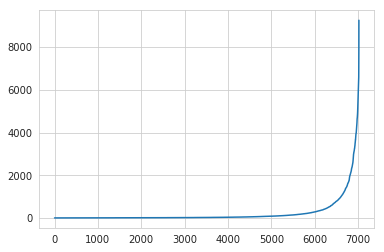

In [0]:
%matplotlib inline
#dataframesorted=xtrain.sort_values(['movie'])
import seaborn as sns
plt.plot(traincount)

In [0]:
print('no. of unique users in test data',len(np.unique(xtest['user'])))
print('no. of unique movies in test data',len(np.unique(xtest['movie'])))

no. of unique users in test data 193135
no. of unique movies in test data 6441


In [0]:
def human(num,units='M'):
    units=units.lower()
    num=float(num)
    if units=='k':
        return str(num/10**3)+'k'
    elif units=='m':
        return str(num/10**6)+'M'
    elif units=='b':
        return str(num/10**9)+'B'

In [0]:
xtrain[:2]

,movie,user,rating,date
710479,2743,2060720,4,2004-08-02
221746,862,1682587,4,2005-10-05


In [0]:
print(np.unique(xtrain['movie']))

[   1    2    3 ... 7055 7056 7057]


In [0]:
print(xtrain.shape)
print(xtest.shape)

(1600000, 4)
(400000, 4)


In [0]:
xtrain.head(5)

,movie,user,rating,date
710479,2743,2060720,4,2004-08-02
221746,862,1682587,4,2005-10-05
305018,1180,1727961,2,2003-02-21
1476253,5401,2025791,5,2005-11-08
184201,708,1571958,3,2004-01-02


In [0]:
xtest.head(5)

,movie,user,rating,date
1843394,6524,1376939,4,2005-08-01
341215,1324,649244,4,2004-11-10
995317,3801,1746056,3,2002-05-16
843750,3272,976534,2,2005-07-05
13275,58,1632435,1,2004-09-28


## WE ARE GENERATING THE SPARSE MATRIX BASED ON THE DATA THAT WE HAVE.WITH THE USERS AS ROWS AND MOVIES AS THE COLUMNS AND THE VALUES IN THE MATRIX AS THE RATING VALUES FOR THE MOVIE.

In [0]:
trainsparsematrix=sparse.csr_matrix((xtrain['rating'].values,(xtrain['user'].values,xtrain['movie'].values)),)

In [0]:
testsparsematrix=sparse.csr_matrix((xtest['rating'].values,(xtest['user'].values,xtest['movie'].values)),)

In [0]:
print(testsparsematrix.shape)

(2649430, 7058)


In [0]:
print(trainsparsematrix.shape)

(2649430, 7058)


###MEASURING THE SPARSITY OF THE MATRIX

In [0]:
us,mv=trainsparsematrix.shape
elem=trainsparsematrix.count_nonzero()
print('sparsity of train matrix :{}'.format((1-(elem/(us*mv)))*100))

sparsity of train matrix :99.99144370244933


In [0]:
moviemoviesimilarity=cosine_similarity(X=trainsparsematrix.T,dense_output=False)

####WE HAVE THE 2.64 MILLION NUMBER OF UNIQUE USERS IN OUR DATA AND THE 3826 UNIQUE NUMBER OF MOVIES .DUE TO LACK OF COMPUTATION POWER WE ARE NOT GENERATING THE USER USER SIMILARITY MATRIX BUT WE ARE GENEARATING THE MOVIE MOVIE SIMILARIY MATRIX. WE ARE USING THE COSINE SIMILARITY BASED ON THE DISTANCE BETWEEN THE EACH OF THE 3826 UNIQUE VECTORS TO THE ANOTHER UNIQUE VECTOR WE WILL CALCULATE THE COSINE SIMILARITY VALUES AND WE GENERATE THE MOVIE MOVIE SIMILARITY MATRIX.SO THE MOVIE MOVIE SIMILARITY MATRIX WILL BE OF THE SHAPE 3826,3826.SUPPOSE IF WE HAVE A USER WITH MOVIE RATINGS WE USE THE SIMILARITY MATRIX WE WILL FIND THE SIMILAR MOVIES TO HIS RATING VECTOR AND RECCOMEND HIM THE MOVIES WITH HIGHER VALUE OF COSINE SIMILARITY.

In [0]:
print(moviemoviesimilarity.shape)

(7058, 7058)


In [0]:
movieids=np.unique(moviemoviesimilarity.nonzero()[1])

In [0]:
print(movieids)

[   1    2    3 ... 7055 7056 7057]


In [0]:
#we know that nonzero() function gives us the non zero values present

###CONVERSION OF SPARSE MOVIEMOVIESIMILARIT MATRIX TO ARRAY

In [0]:
similarmovies=moviemoviesimilarity.toarray()
print(similarmovies.shape)
print(similarmovies)

(7058, 7058)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.00509544]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.00509544 0.         1.        ]]


In [0]:
print(movieids)

[   1    2    3 ... 7055 7056 7057]


####***this is the important step that we are performing***
*taking the 20 most similar movies based ont their rating values
* 1.taking the particular row of the matrix of movie id
* 2.making it into sing le array using ravel function
* 3.sorting the values based on their indices in the descending order
* 4.taking top 20 of them storing them into a dict
####** the advantage of doing so is  when you have a movie id with you
if you want to find what are the similar movies to that particular movie
we can find this using their indices that are sorted and print those movies
.you can reccommend that movies to the user who liked the movie based on the 
movie ids we got above.**

###WE HAVE GENERATED THE MOVIE MOVIE SIMILARITY MATRIX IF WE WNAT RECCOMEND TOP 20 MOVIES TO THE USER WHO HAS GIVE HIGHER VALUE OF RATING FOR THE PARTICULAR MOVIE WE WILL TAKE THE INDEX OF IT AND GET COSINE SIMILARITY OF THE PARTICULAR MOVIE. TAKE THE TOP HIGHER 20 VALUES OF COSINE SIMLARITY AND PRINT THE MOVIES BASED ON THE INDEXES OF THOSE MOVIES.


####GENERATING SIMILAR MOVIES F ALL THE MOVIE IDS

In [0]:
similar_movies=dict()
for movie in movieids:
    sim_movies = moviemoviesimilarity[movie].toarray().ravel().argsort()[::-1][1:]
    similar_movies[movie] = sim_movies[:20]
    


In [0]:
link1 = 'https://drive.google.com/open?id=1QGzuAaneSbr_PElQov6BxRrGRdgfxd8a' # The shareable link

In [0]:
fluff, id = link1.split('=')
print (id) # Verify that you have everything after '='

1QGzuAaneSbr_PElQov6BxRrGRdgfxd8a


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Copy of movie_titles.csv')  


In [0]:
movietitle=pd.read_csv('Copy of movie_titles.csv',sep=',',names=['movieid','yearofrelease','titleofname'],index_col = 'movieid', encoding = "ISO-8859-1")

In [0]:
movietitle[:5]

,yearofrelease,titleofname
movieid,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [0]:
movietitle.shape

(17770, 2)

####scipy.sparse.csr_matrix.getnnz
#####this is the function used to get the count explicitly
####csr_matrix.getnnz(axis=None)[source]

In [0]:
#we use the function to get the count explicitly from csr csr matrix

In [0]:
#for example i want the similar movies to the 27 movie
movieid=67
#i declared
#i will  see in how many rows in my data have the title same as the id 27
x=data.loc[data.movie==7]

In [0]:
print(x)

     movie     user  rating        date
274      7  1666693       1  2001-09-08
273      7   752642       1  2001-10-18
272      7  1623047       2  2005-06-27
271      7  2496985       3  2005-09-16


In [0]:
print(x.shape)

(4, 4)


In [0]:
#there are 273 number of users haivng 67 as movie
similarities=moviemoviesimilarity[movieid].toarray().ravel()
print(similarities)

[0.         0.         0.         ... 0.         0.         0.00397928]


In [0]:
similarindices=similarities.argsort()[::-1]

In [0]:
print(similarindices)

[  67  308 2812 ... 2519 2518    0]


**we got top similar movie ids of the movie id 67
from csv file we print them using .loc**

# THIS IS THE BEST THING THAT HAPPEN IN THE MOVIE MOVIE SIMILARITY. WE HAVE JUST CONSTRUCTED THE MOVIE MOVIE SIMILARITY MATRIX USING THE COSINE SIMILARITY. AND TAKING THE MOVIES THAT HAVE HIGHER SIMILAR VALUE AND JUST PRINTING THE TITLES .
#### THE KEY TAKE AWAYS ARE TITLE OF MOVIE 'GOLDEN VAMPIRES'
#### TITLE OF MOVIE 'LAST VAMPIRE'
##### ANOTHER MOVIE WITH SAME YEAR

In [0]:
movietitle.loc[similarindices][:5]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,yearofrelease,titleofname
movieid,,
67,1997.0,Vampire Journals
308,1974.0,The Legend of the 7 Golden Vampires/7 Brothers...
2812,2000.0,Blood: The Last Vampire
1082,1997.0,Flood: A River's Rampage
2442,1972.0,Godzilla vs. Gigan


In [0]:
movietitle.loc[67]

yearofrelease                1997
titleofname      Vampire Journals
Name: 67, dtype: object

# WE CAN GENERATE THE SPARSE MATRIX BASED ON THE NUMBER OF USERS ,NUMBER OF MOVIES
#BUT THE REASON OF SESSION IS GETTING CRASHED WE ARE DOING FOR 12000 USERS AND 1500 MOVIES INSTEAD OF 25K USERS AND 3KMOVIES

#JUST WHAT IT RETURNS AND HOW THIS WILL RETURN WE HAVE WRITTEN FOE SAMPLE

#FROM HERE THE TASK1 STARTS WE WILL BE USING THE STRATEGY FOR REDUCING THE RMSE WE WILL BE USING THE STACK TYOE OF MODELS WITH XGBOOST AND THE SURPRISE LIBRARY  

* BEFORE APPLYING THE MODELS WE WILL SAMPLE THE NUMBER OF MOVIES AND THE NUMBER OF USERS THAT WE GONNA CONSIDER.
* AS PART OF ASSIGNMENT WW WILL DO FOR 25K USERS AND 3000 MOVIES.
* WE WILL GENERATE THE MSPARSE MATRIX OUT OF IT AND WE WILL DO THE FEATURISATION AND APPLY MODELS ON TOP OF THEM.
* WE WILL GENERATE THE 13 HAND CRAFTED FEATURES+TH OUTPUT PREDICTION OF BASELINE SIMILARITY AS THE FEATURE+THE OUTPUT PREDICTION OF THE KNN BASED SIMILARITY AS THE FEATURE+THE OUTPUT PREDCITION OF THE MATRIX FACTORIZATION USING SVD AS A FEATURE.

In [0]:
def get_sample_sparse_matrix(sparse_matrix, no_users, no_movies,verbose = True):
   
    row_ind, col_ind, ratings = sparse.find(sparse_matrix)
    users = np.unique(row_ind)
    movies = np.unique(col_ind)

    print("Original Matrix : (users, movies) -- ({} {})".format(len(users), len(movies)))
    print("Original Matrix : Ratings -- {}\n".format(len(ratings)))

    # It just to make sure to get same sample everytime we run this program..
    # and pick without replacement....
    np.random.seed(15)
    sample_users = np.random.choice(users, no_users, replace=False)
    sample_movies = np.random.choice(movies, no_movies, replace=False)
    # get the boolean mask or these sampled_items in originl row/col_inds..
    mask = np.logical_and( np.isin(row_ind, sample_users),
                      np.isin(col_ind, sample_movies) )
    
    sample_sparse_matrix = sparse.csr_matrix((ratings[mask], (row_ind[mask], col_ind[mask])),
                                             shape=(max(sample_users)+1, max(sample_movies)+1))

    if verbose:
        print("Sampled Matrix : (users, movies) -- ({} {})".format(len(sample_users), len(sample_movies)))
        print("Sampled Matrix : Ratings --", format(ratings[mask].shape[0]))

     
    return sample_sparse_matrix

In [0]:
finaltrain_sparse_matrix = get_sample_sparse_matrix(trainsparsematrix, no_users=20000, no_movies=2500)

Original Matrix : (users, movies) -- (333670 7022)
Original Matrix : Ratings -- 1600000

Sampled Matrix : (users, movies) -- (20000 2500)
Sampled Matrix : Ratings -- 37692


In [0]:
finaltest_sparse_matrix = get_sample_sparse_matrix(testsparsematrix, no_users=17500, no_movies=1800)

Original Matrix : (users, movies) -- (193135 6441)
Original Matrix : Ratings -- 400000

Sampled Matrix : (users, movies) -- (17500 1800)
Sampled Matrix : Ratings -- 9939


<h3> 4.3.1 Featurizing data for regression problem </h3>

In [0]:
# get users, movies and ratings from our samples train sparse matrix
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(finaltrain_sparse_matrix)

In [0]:

sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(finaltest_sparse_matrix)

In [0]:
print(len(sample_train_users))
print(len(sample_train_movies))

37692
37692


In [0]:
print(len(sample_test_movies))

9939


In [0]:
def get_average_ratings(sparse_matrix, of_users):
    
    # average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes

    # ".A1" is for converting Column_Matrix to 1-D numpy array 
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    # Boolean matrix of ratings ( whether a user rated that movie or not)
    is_rated = sparse_matrix!=0
    # no of ratings that each user OR movie..
    no_of_ratings = is_rated.sum(axis=ax).A1
    
    # max_user  and max_movie ids in sparse matrix 
    u,m = sparse_matrix.shape
    # creae a dictonary of users and their average ratigns..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(u if of_users else m) 
                                    if no_of_ratings[i] !=0}

    # return that dictionary of average ratings
    return average_ratings

In [0]:
sample_train_averages = dict()
# get the global average of ratings in our train set.
global_average = finaltrain_sparse_matrix.sum()/finaltrain_sparse_matrix.count_nonzero()
sample_train_averages['global'] = global_average
sample_train_averages['user'] = get_average_ratings(finaltrain_sparse_matrix, of_users=True)
sample_train_averages['movie'] =  get_average_ratings(finaltrain_sparse_matrix, of_users=False)
print('\n No of ratings in Our Sampled train matrix is : {}\n'.format(finaltrain_sparse_matrix.count_nonzero()))
print('\n No of ratings in Our Sampled test  matrix is : {}\n'.format(finaltest_sparse_matrix.count_nonzero()))


 No of ratings in Our Sampled train matrix is : 37692


 No of ratings in Our Sampled test  matrix is : 9939



In [0]:
import tqdm
count = 0
l=[]
l1=[]
l2=[]
for (user, movie, rating)  in zip(sample_train_users, sample_train_movies, sample_train_ratings):
  
  user_sim = cosine_similarity(finaltrain_sparse_matrix[user], finaltrain_sparse_matrix).ravel()
  top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
  # get the ratings of most similar users for this movie
  top_ratings = finaltrain_sparse_matrix[top_sim_users, movie].toarray().ravel()
  #we will make it's length "5" by adding movie averages to .
  top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
  top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
  #     print(top_sim_users_ratings, end=" ")    


            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"        
  movie_sim = cosine_similarity(finaltrain_sparse_matrix[:,movie].T, finaltrain_sparse_matrix.T).ravel()
  top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
   # get the ratings of most similar movie rated by this user..
  top_ratings = finaltrain_sparse_matrix[user, top_sim_movies].toarray().ravel()
   # we will make it's length "5" by adding user averages to.
  top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
  top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
  #     print(top_sim_movies_ratings, end=" : -- ")
  #-----------------prepare the row to be stores in a file-----------------# 
  row = list()
  
  row.append(user)
  row.append(movie)
            # Now add the other features to this data...
  row.append(sample_train_averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
  row.extend(top_sim_users_ratings)
           # next 5 features are "user" ratings for similar_movies
  row.extend(top_sim_movies_ratings)
        # Avg_user rating
  row.append(sample_train_averages['user'][user])
            # Avg_movie rating
  row.append(sample_train_averages['movie'][movie])

            # finalley, The actual Rating of this user-movie pair...
  row.append(rating)
  l.append(row)
  if count%100==0:
    print(count)
  count = count + 1
 

#FROM HERE WE GET THE 13 HANDCRAFTED FEATURES FOR TRAIN DATA THAT WE CAN APPLY FOR THE XGBOOST REGRESSOR FOR OHTER FEATURES WE HAVE TO RELY ON THE SURPRISE MODESL.

In [0]:
dataframe=pd.DataFrame(l,columns=['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'])

In [0]:
dataframe.to_csv('myworktrain.csv')

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'myworktrain.csv'})
uploaded.SetContentFile('myworktrain.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1N6lvmdvkSrOXdsY0OGAslZggpHEfZhfy


<h4> 4.3.1.2 Featurizing test data </h4>

In [0]:
# get users, movies and ratings from the Sampled Test 
sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(finaltest_sparse_matrix)

In [0]:
sample_train_averages['global']

3.5968905868619334

In [0]:
sample_test_averages = dict()
# get the global average of ratings in our train set.
global_average = finaltrain_sparse_matrix.sum()/finaltrain_sparse_matrix.count_nonzero()
sample_test_averages['global'] = global_average
sample_test_averages['user'] = get_average_ratings(finaltrain_sparse_matrix, of_users=True)
sample_test_averages['movie'] =  get_average_ratings(finaltrain_sparse_matrix, of_users=False)
print('\n No of ratings in Our Sampled train matrix is : {}\n'.format(finaltrain_sparse_matrix.count_nonzero()))
print('\n No of ratings in Our Sampled test  matrix is : {}\n'.format(finaltest_sparse_matrix.count_nonzero()))


 No of ratings in Our Sampled train matrix is : 37692


 No of ratings in Our Sampled test  matrix is : 6856



In [0]:
lis=[]
count=0
count1=0
for (user, movie, rating)  in zip(sample_test_users, sample_test_movies, sample_test_ratings):
 
  user_sim = cosine_similarity(finaltrain_sparse_matrix[user], finaltrain_sparse_matrix).ravel()
  top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
  # get the ratings of most similar users for this movie
  top_ratings = finaltrain_sparse_matrix[top_sim_users, movie].toarray().ravel()
  #we will make it's length "5" by adding movie averages to .
  row = list()
  
  row.append(user)
  row.append(movie)
  
  row.append(sample_test_averages['global']) 
  try:
    top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
    top_sim_users_ratings.extend([sample_test_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
    row.extend(top_sim_users_ratings)
  except:
    row.extend([3.5,3.5,3.5,3.5,3.5])    
  movie_sim = cosine_similarity(finaltrain_sparse_matrix[:,movie].T, finaltrain_sparse_matrix.T).ravel()
  top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
   # get the ratings of most similar movie rated by this user..
  top_ratings = finaltrain_sparse_matrix[user, top_sim_movies].toarray().ravel()
  
  try:
    top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
    top_sim_movies_ratings.extend([sample_test_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
    row.extend(top_sim_movies_ratings)
  except:
    row.extend([3.5,3.5,3.5,3.5,3.5])
  try:
    row.append(sample_test_averages['user'][user])
  except:
    row.append(3.5)
  try:
    row.append(sample_test_averages['movie'][movie])
  except:
    row.append(3)
  row.append(rating)
  lis.append(row)
  if count%100==0:
    print(count)
  count = count + 1
 

#FROM HERE WE CAN GET THE 13 HANDCRAFTED FEATURES FOR THE TEST DATA FOR OTHER FEATURES WE  HAVE TO USE THE SUPRISE MODELS

In [0]:
dataframe2=pd.DataFrame(lis,columns=['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'])

In [0]:
dataframe2.to_csv('myworktestfinal.csv')

In [150]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title1': 'myworktestfinal'})
uploaded.SetContentFile('myworktestfinal.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1bkq7ClEsQDmxsN4EiT9cAIiYP9PxdAIM


#THIS IS DONE FOR THE AS PART OF ASSIGNMENT

In [0]:
!pip install surprise

    100% |████████████████████████████████| 3.3MB 6.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/ec/c0/55/3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise


#ASSIGNMENT STARTS FROM HERE

In [0]:
# this is just to know how much time will it take to run this entire ipython notebook 
from datetime import datetime
# globalstart = datetime.now()
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set_style('whitegrid')
import os
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random

In [0]:

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
linka = 'https://drive.google.com/open?id=1Ue5VKZcIMjlT5Iwiqqnp_Rh7ujVVRosX' # The shareable link

In [4]:
fluff, id = linka.split('=')
print (id) # Verify that you have everything after '='

1Ue5VKZcIMjlT5Iwiqqnp_Rh7ujVVRosX


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('reg_train.csv')  


In [0]:
import pandas as pd
regtrain=pd.read_csv('reg_train.csv',names=['user','movie','GAvg','sur1','sur2','sur3','sur4','sur5','smr1','smr2','smr3','smr4','smr5','UAvg','MAvg','rating'])


In [0]:
regtrain.head(5)
reg_train=regtrain[['user','movie','GAvg','sur1','sur2','sur3','sur4','sur5','smr1','smr2','smr3','smr4','smr5','UAvg','MAvg','rating']]

In [11]:
reg_train.head(5)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3
2,99865,33,3.581679,5.0,5.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,4.0,3.714286,4.092437,5
3,101620,33,3.581679,2.0,3.0,5.0,5.0,4.0,4.0,3.0,3.0,4.0,5.0,3.584416,4.092437,5
4,112974,33,3.581679,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,3.750000,4.092437,5


In [0]:
id='1bkq7ClEsQDmxsN4EiT9cAIiYP9PxdAIM'

In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('myworktestfinal.csv')  


In [14]:
reg_train.head(5)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3
2,99865,33,3.581679,5.0,5.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,4.0,3.714286,4.092437,5
3,101620,33,3.581679,2.0,3.0,5.0,5.0,4.0,4.0,3.0,3.0,4.0,5.0,3.584416,4.092437,5
4,112974,33,3.581679,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,3.750000,4.092437,5


In [0]:
regtest_df=pd.read_csv('myworktestfinal.csv')
#regtest_df=dataframe2
reg_test_df=regtest_df[['user','movie','GAvg','sur1','sur2','sur3','sur4','sur5','smr1','smr2','smr3','smr4','smr5','UAvg','MAvg','rating']]

In [16]:

reg_test_df.columns

Index(['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5', 'smr1',
       'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'],
      dtype='object')

In [17]:

reg_test_df.head(20)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,62741,8,3.596891,3.5,3.5,3.5,3.5,3.5,5.0,5.0,5.0,5.000000,5.000000,5.000000,3.0,4
1,205094,8,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.500000,3.500000,3.500000,3.0,3
2,228048,8,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.500000,3.500000,3.500000,3.0,4
3,254671,8,3.596891,3.5,3.5,3.5,3.5,3.5,4.0,5.0,5.0,4.666667,4.666667,4.666667,3.0,4
4,272190,8,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.500000,3.500000,3.500000,3.0,3
5,278713,8,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.500000,3.500000,3.500000,3.0,5
6,378657,8,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.500000,3.500000,3.500000,3.0,5
7,446078,8,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.500000,3.500000,3.500000,3.0,5
8,898996,8,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.500000,3.500000,3.500000,3.0,2
9,981808,8,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.500000,3.500000,3.500000,3.0,4


In [0]:
#from now we start using surprise libraries to build various models opn our data
#We can't give raw data (movie, user, rating) to train the model in Surprise library.
#They have a saperate format for TRAIN and TEST data, which will be useful for training the models like SVD, KNNBaseLineOnly....etc..,in Surprise.
#We can form the trainset from a file, or from a Pandas DataFrame. http://surprise.readthedocs.io/en/stable/getting_started.html#load-dom-dataframe-py

In [19]:
!pip install surprise

In [0]:
from surprise import Reader, Dataset

In [0]:
# It is to specify how to read the dataframe.
# for our dataframe, we don't have to specify anything extra..
reader = Reader(rating_scale=(1,5))

# create the traindata from the dataframe...
train_data = Dataset.load_from_df(reg_train[['user', 'movie', 'rating']], reader)

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset = train_data.build_full_trainset() 

In [22]:
testset = list(zip(reg_test_df.user.values, reg_test_df.movie.values, reg_test_df.rating.values))
testset[:3]

[(62741, 8, 4), (205094, 8, 3), (228048, 8, 4)]

In [23]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

({}, {})

## IMPORTING THE FILES AND CONVERTING THE DATA SO THAT IT CAN FIT INTO THE SURPRISE MODELS. WE GONNA APPLY THE REGRESSION MODELS ON TOP OF THESE MODELS. WE WILL USE THESE TECHNIQUES AND FORM THE SURPRISE MODELS WE GONNA GET THE PREDICTED VALUES,. WE WILL USE THESE PREDICTED VALUES AS THE FEATURES FOR THE NEXT MODELS.

## WE WIRTE THE UTILTY FUNCTIONS FOR THE MODELS THAT WE ARE RUNNING. WE IMPORT THE MODELS FROM SURPRISE AND PASS THROUGH THE UTILTIY FUNCTIONS AND OBTAIN THE RESULTS. IN CASE OF  XGBOOST WE WILL HYPERPARAMETER TUNE USING THE TRAIN DATA. IN CASE IF XGBOOST WE DO FOT THE NUMBER OF ESTIMATORS AND THE DEPTH OF TREE.

In [0]:
# to get rmse and mape given actual and predicted ratings..
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape


def run_xgboost(algo,  x_train, y_train, x_test, y_test, verbose=True):
    
    train_results = dict()
    test_results = dict()
    
    
    algo.fit(x_train, y_train, eval_metric = 'rmse')
    
    print('Evaluating the model with TRAIN data...')
    start =datetime.now()
    y_train_pred = algo.predict(x_train)
    # get the rmse and mape of train data...
    rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)
    
    # store the results in train_results dictionary..
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}
    
   
    # get the test data predictions and compute rmse and mape
    print('Evaluating Test data')
    y_test_pred = algo.predict(x_test) 
    rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred=y_test_pred)
    # store them in our test results dictionary.
    test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions':y_test_pred}
    print(y_test_pred)
    print(np.array(y_test))
    if verbose:
        print('\nTEST DATA')
        print('-'*30)
        print('RMSE : ', rmse_test)
        print('MAPE : ', mape_test)
       
    # return these train and test results...
    return train_results, test_results
    

## UTILITY FUNCTIONS FOR THE RUNNING SURPRISE MODELS

In [0]:
# it is just to makesure that all of our algorithms should produce same results
# everytime they run...

my_seed = 15
np.random.seed(my_seed)

##########################################################
# get  (actual_list , predicted_list) ratings given list 
# of predictions (prediction is a class in Surprise).    
##########################################################
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

################################################################
# get ''rmse'' and ''mape'' , given list of prediction objecs 
################################################################
def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100
##################################################################################
# It will return predicted ratings, rmse and mape of both train and test data   #
##################################################################################
def run_surprise(algo, trainset, testset, verbose=True): 
    '''
        return train_dict, test_dict
    
        It returns two dictionaries, one for train and the other is for test
        Each of them have 3 key-value pairs, which specify ''rmse'', ''mape'', and ''predicted ratings''.
    '''
    start = datetime.now()
    # dictionaries that stores metrics for train and test..
    train = dict()
    test = dict()
    
    # train the algorithm with the trainset
    st = datetime.now()
    print('Training the model...')
    algo.fit(trainset)
    print('Done. time taken : {} \n'.format(datetime.now()-st))
    
    # ---------------- Evaluating train data--------------------#
    st = datetime.now()
    print('Evaluating the model with train data..')
    # get the train predictions (list of prediction class inside Surprise)
    train_preds = algo.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    
    # get ''rmse'' and ''mape'' from the train predictions.
    train_rmse, train_mape = get_errors(train_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    
    #store them in the train dictionary
    if verbose:
        print('adding train results in the dictionary..')
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings
    
    #------------ Evaluating Test data---------------#
    st = datetime.now()
    print('\nEvaluating for test data...')
    # get the predictions( list of prediction classes) of test data
    test_preds = algo.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse, test_mape = get_errors(test_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    # store them in test dictionary
    if verbose:
        print('storing the test results in test dictionary...')
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    
    
    # return two dictionaries train and test
    return train, test

## MODELLING STRATEGY
* APPLYING THE XGBOOST REGRESSOR ON TOP OF ALREADY GENERATED 13 FEATURES LIKE GLOBAL AVERAGE, RATINGS GIVEN BY THE 5 SIMILAR USERS ,RATINGS GIVEN TO THE 5 SIMILAR  MOVIES,AVERAGE OF THE RATINGS 5 SIMILAR USERS,AVERAGE  OF RATINGS OF 5 SIMILAR MOVIES.
* APPLY THE SURPRISE BASE LINE MODEL WITH 13 FEATURES AND OBTAIN THE PREDICTED VALUES.
* APPLY THE XG BOOST REGRESSION MODELS BY HYPERPARAMETER TUNING WITH 13 FEATURES AND THE PREDICTED VALUES GENERATED BY THE SURPRISE BASELINE MODEL.
* APPLY THE KNN MODEL WITH USER USER SIMILARITY WITH 13 FEATURES AND OBTAIN THE PREDICTED VALUES.
* APPLY THE KNN MODEL WITH MOVIE MOVIE SIMILARITY WITH 13 FEATURES AND OBTAIN THE PREDICTED VALUES
* APPLY THE MATRIX FACTORIZATION SVD USING SURPRISE OVER THE TRAIN DATA WITH 13 FEATURES OBTAIN PREDICTED VALUES
* APPLY THE MATRIX FACTORIZATION SVD++ WITH SURPRISE AND OBTAIN THE PREDUICTED VALUES
* APPLY THE XG BOOST REGRESSOR ON TOP OF KNN MODELLED FEATURES AND MATRIX FACTORISED FEATURES AND KNN FEATURES + 13 FEATURES 

## COMAPRE THE ERROR OBTAINED FROM THE MODELS RMSE AND MAPE AND HOW THE MODELS PERFORMED.

<h3> 4.4.1 XGBoost with initial 13 features </h3>

In [0]:
import xgboost as xgb

In [27]:
x_train = reg_train.drop(['user','movie','rating'], axis=1)
y_train = reg_train['rating']
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']
x_train.head(5)


,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg
0,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437
1,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437
2,3.581679,5.0,5.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,4.0,3.714286,4.092437
3,3.581679,2.0,3.0,5.0,5.0,4.0,4.0,3.0,3.0,4.0,5.0,3.584416,4.092437
4,3.581679,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,3.750000,4.092437


In [28]:
x_test.head(5)

,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg
0,3.596891,3.5,3.5,3.5,3.5,3.5,5.0,5.0,5.0,5.000000,5.000000,5.000000,3.0
1,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.500000,3.500000,3.500000,3.0
2,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.500000,3.500000,3.500000,3.0
3,3.596891,3.5,3.5,3.5,3.5,3.5,4.0,5.0,5.0,4.666667,4.666667,4.666667,3.0
4,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.500000,3.500000,3.500000,3.0


In [29]:
y_train.head(5)

0    4
1    3
2    5
3    5
4    5
Name: rating, dtype: int64

In [30]:
y_test.head(5)

0    4
1    3
2    4
3    4
4    3
Name: rating, dtype: int64

## WE HAVE USED THE XGBOOST REGRESSOR AND PERFORMED THE HYPERPARAMETER TUNING AND OBTAINED THE BEST PARAMETERS. USING THIS BEST PARAMETERS WE WILL TRAIN THE XGB MODEL AND OBTAIN THE MSE AND MAPE VALUES.

In [125]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
hyper_parameter = {"max_depth":[1,5,10,20], "n_estimators":[40, 80, 150,200]}
firstxgb=xgb.XGBRegressor()
best_parameter = RandomizedSearchCV(firstxgb, hyper_parameter, scoring = "neg_mean_absolute_error", cv = 3)
best_parameter.fit(x_train,y_train)
estimators = best_parameter.best_params_["n_estimators"]
depth = best_parameter.best_params_["max_depth"]
print(best_parameter.best_params_)


{'n_estimators': 150, 'max_depth': 5}


Evaluating the model with TRAIN data...
Evaluating Test data
[4.9839535 3.2801645 3.2801645 ... 3.7214463 3.2801645 3.2801645]
[4 3 4 ... 3 3 3]

TEST DATA
------------------------------
RMSE :  1.096898490464984
MAPE :  32.66595668281339


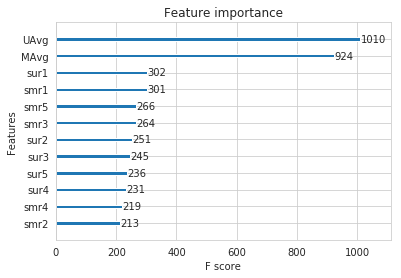

In [127]:
# initialize Our first XGBoost model...
%matplotlib inline
import matplotlib.pyplot as plt
x_train = reg_train.drop(['user','movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

first_xgb = xgb.XGBRegressor(max_depth=5,n_estimators=150)
train_results, test_results = run_xgboost(first_xgb, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['first_algo'] = train_results

models_evaluation_test['first_algo'] = test_results

xgb.plot_importance(first_xgb)
plt.show()

## WE HAVE USED SURPRISE BASELEARN MODEL AFTER USING THE XGBOOST REGRESSOR AS A PART OF OUR MODELLING STRATEGY.THE GENERATED OUTPUT IS FED AS A OUTPUT TO THE NEXT MODEL THAT IS XG BOOST REGRESSOR.

In [54]:
print(trainset)

In [31]:
from surprise import BaselineOnly 
# options are to specify.., how to compute those user and item biases
bsl_options = {'method': 'sgd',
               'learning_rate': .001
               }
bsl_algo = BaselineOnly(bsl_options=bsl_options)
# run this algorithm.., It will return the train and test results..
bsl_train_results, bsl_test_results = run_surprise(bsl_algo, trainset, testset, verbose=True)


# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['bsl_algo'] = bsl_train_results 
models_evaluation_test['bsl_algo'] = bsl_test_results

Training the model...
Estimating biases using sgd...
Done. time taken : 0:00:00.641308 

Evaluating the model with train data..
time taken : 0:00:01.221677
---------------
Train Data
---------------
RMSE : 0.9347153928678286

MAPE : 29.389572652358183

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.248501
---------------
Test Data
---------------
RMSE : 1.0849691787617808

MAPE : 35.43509593097902

storing the test results in test dictionary...


In [56]:
# add our baseline_predicted value as our feature..
reg_train['bslpr'] = models_evaluation_train['bsl_algo']['predictions']
reg_train.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,62741,8,3.596891,3.5,3.5,3.5,3.5,3.5,5.0,5.0,5.0,5.0,5.0,5.0,3.0,4,3.718377
1,205094,8,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.0,3,3.704770


In [57]:
# add that baseline predicted ratings with Surprise to the test data as well
reg_test_df['bslpr']  = models_evaluation_test['bsl_algo']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,62741,8,3.596891,3.5,3.5,3.5,3.5,3.5,5.0,5.0,5.0,5.0,5.0,5.0,3.0,4,3.718377
1,205094,8,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.0,3,3.704770


##WE WILL UPDATE THE DATAFRAMES WITH THE FEATURES OUTPUT OBTAINED FROM THE BASELINEONLY MODEL.

In [161]:
# prepare train data
x_train = reg_train.drop(['user', 'movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
hyper_parameter = {"max_depth":[1,5,10,20], "n_estimators":[40, 80,100,120,130, 150,200]}
firstxgb=xgb.XGBRegressor()
best_parameter = RandomizedSearchCV(firstxgb, hyper_parameter, scoring = "neg_mean_absolute_error", cv = 3)
best_parameter.fit(x_train,y_train)
estimators = best_parameter.best_params_["n_estimators"]
depth = best_parameter.best_params_["max_depth"]
print(best_parameter.best_params_)



{'n_estimators': 120, 'max_depth': 5}


In [162]:
x_train.head(5)

,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,bslpr
0,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,3.898982
1,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3.371403
2,3.581679,5.0,5.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,4.0,3.714286,4.092437,3.323708
3,3.581679,2.0,3.0,5.0,5.0,4.0,4.0,3.0,3.0,4.0,5.0,3.584416,4.092437,3.378411
4,3.581679,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,3.750000,4.092437,3.691637


Evaluating the model with TRAIN data...
Evaluating Test data
[4.945638  3.2851849 3.2851849 ... 3.7260194 3.2851849 3.2851849]
[4 3 4 ... 3 3 3]

TEST DATA
------------------------------
RMSE :  1.0927473054727812
MAPE :  32.68783853932028


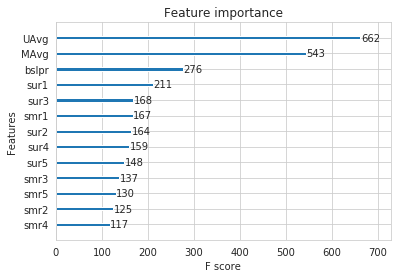

In [164]:
# initialize Our first XGBoost model...
xgb_bsl = xgb.XGBRegressor(max_depth=5,estimators=120)
train_results, test_results = run_xgboost(xgb_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_bsl'] = train_results
models_evaluation_test['xgb_bsl'] = test_results

xgb.plot_importance(xgb_bsl)
plt.show()


## WE HAVE RUN THE XGBOOST REGRESSOR AFTER RUNNING THE BASE LINE MODEL AFTER THIS WE GONNA RUN SURPRISE KNN MODEL WITH USER-USER SIMILARITY.AND WE TAKE THE OUTPUT AS A FEATUREAND PROCEED WITH MODELLING STRATEGY.

##IF U OBSERVE THE PREDICTED VALUE OF THE BASELINE MODEL HAS HIGHEST FEATURE IMPORTANCE

In [32]:
from surprise import KNNBaseline
# we specify , how to compute similarities and what to consider with sim_options to our algorithm
sim_options = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'} 

knn_bsl_u = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)
knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_u'] = knn_bsl_u_train_results 
models_evaluation_test['knn_bsl_u'] = knn_bsl_u_test_results


Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:34.331387 

Evaluating the model with train data..
time taken : 0:01:55.969315
---------------
Train Data
---------------
RMSE : 0.33642097416508826

MAPE : 9.145093375416348

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.123278
---------------
Test Data
---------------
RMSE : 1.0850672215502424

MAPE : 35.41803706931065

storing the test results in test dictionary...


## AFTER RUNNING THE KNN BASED ON USER-USER SIMILARITY WE WILL RUN ON THE KNN BASEON IN THE MOVIE-MOVIE SILARITY ND OBTAIN THE FEATURE.

In [33]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm

# 'user_based' : Fals => this considers the similarities of movies instead of users

sim_options = {'user_based' : False,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'}


knn_bsl_m = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)

knn_bsl_m_train_results, knn_bsl_m_test_results = run_surprise(knn_bsl_m, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_m'] = knn_bsl_m_train_results 
models_evaluation_test['knn_bsl_m'] = knn_bsl_m_test_results


Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:00.918143 

Evaluating the model with train data..
time taken : 0:00:09.390551
---------------
Train Data
---------------
RMSE : 0.32584796251610554

MAPE : 8.447062581998374

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.104315
---------------
Test Data
---------------
RMSE : 1.0850939542806968

MAPE : 35.41841575346227

storing the test results in test dictionary...


## WE GONNA APPEND THE FEATURES ONTAINED FROM THE KNN MODELS.

In [34]:
# add the predicted values from both knns to this dataframe
reg_train['knn_bsl_u'] = models_evaluation_train['knn_bsl_u']['predictions']
reg_train['knn_bsl_m'] = models_evaluation_train['knn_bsl_m']['predictions']

reg_train.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,knn_bsl_u,knn_bsl_m
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4,3.93002,3.867958
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3,3.17733,3.076302


In [35]:
reg_test_df['knn_bsl_u'] = models_evaluation_test['knn_bsl_u']['predictions']
reg_test_df['knn_bsl_m'] = models_evaluation_test['knn_bsl_m']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,knn_bsl_u,knn_bsl_m
0,62741,8,3.596891,3.5,3.5,3.5,3.5,3.5,5.0,5.0,5.0,5.0,5.0,5.0,3.0,4,3.581679,3.581679
1,205094,8,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.0,3,3.581679,3.581679


In [137]:
# prepare the train data....
x_train = reg_train.drop(['user', 'movie', 'rating'], axis=1)
y_train = reg_train['rating']

# prepare the train data....
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
hyper_parameter = {"max_depth":[1,5,10,20], "n_estimators":[40, 80, 150,200]}
firstxgb=xgb.XGBRegressor()
best_parameter = RandomizedSearchCV(firstxgb, hyper_parameter, scoring = "neg_mean_absolute_error", cv = 3)
best_parameter.fit(x_train,y_train)
estimators = best_parameter.best_params_["n_estimators"]
depth = best_parameter.best_params_["max_depth"]
print(best_parameter.best_params_)




{'n_estimators': 200, 'max_depth': 5}


Evaluating the model with TRAIN data...
Evaluating Test data
[4.98754   3.2646291 3.2646291 ... 3.7356312 3.2646291 3.2646291]
[4 3 4 ... 3 3 3]

TEST DATA
------------------------------
RMSE :  1.0978831518435863
MAPE :  32.56725182130872


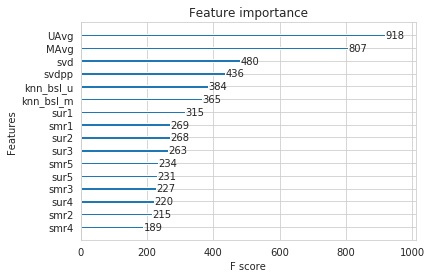

In [61]:
# declare the model
%matplotlib inline
xgb_knn_bsl = xgb.XGBRegressor(n_estimators=200,max_depth=5)
train_results, test_results = run_xgboost(xgb_knn_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_knn_bsl'] = train_results
models_evaluation_test['xgb_knn_bsl'] = test_results


xgb.plot_importance(xgb_knn_bsl)
plt.show()

In [37]:
from surprise import SVD
# initiallize the model
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svd'] = svd_train_results 
models_evaluation_test['svd'] = svd_test_results

Training the model...
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Done. time taken : 0:00:08.647266 

Evaluating the model with train data..
time taken : 0:00:01.439870
---------------
Train Data
---------------
RMSE : 0.6574721240954099

MAPE : 19.704901088660474

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.093904
---------------
Test Data
---------------
RMSE : 1.0849674582896671

MAPE : 35.412522956841286

storing the test results in test dictionary...


In [38]:
from surprise import SVDpp
# initiallize the model
svdpp = SVDpp(n_factors=50, random_state=15, verbose=True)
svdpp_train_results, svdpp_test_results = run_surprise(svdpp, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svdpp'] = svdpp_train_results 
models_evaluation_test['svdpp'] = svdpp_test_results


Training the model...
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
Done. time taken : 0:02:32.994617 

Evaluating the model with train data..
time taken : 0:00:05.864721
---------------
Train Data
---------------
RMSE : 0.6032438403305899

MAPE : 17.49285063490268

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.094583
---------------
Test Data
---------------
RMSE : 1.0843031487781873

MAPE : 35.336796913355

storing the test results in test dictionary...


In [39]:
# add the predicted values from both knns to this dataframe
reg_train['svd'] = models_evaluation_train['svd']['predictions']
reg_train['svdpp'] = models_evaluation_train['svdpp']['predictions']

reg_train.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,knn_bsl_u,knn_bsl_m,svd,svdpp
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4,3.93002,3.867958,4.303764,3.621664
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3,3.17733,3.076302,3.278967,3.538247


In [40]:
reg_test_df['svd'] = models_evaluation_test['svd']['predictions']
reg_test_df['svdpp'] = models_evaluation_test['svdpp']['predictions']

reg_test_df.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,knn_bsl_u,knn_bsl_m,svd,svdpp
0,62741,8,3.596891,3.5,3.5,3.5,3.5,3.5,5.0,5.0,5.0,5.0,5.0,5.0,3.0,4,3.581679,3.581679,3.581679,3.581679
1,205094,8,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.0,3,3.581679,3.581679,3.581679,3.581679


In [43]:
reg_test_df.head(2) 


,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,knn_bsl_u,knn_bsl_m,svd,svdpp
0,62741,8,3.596891,3.5,3.5,3.5,3.5,3.5,5.0,5.0,5.0,5.0,5.0,5.0,3.0,4,3.581679,3.581679,3.581679,3.581679
1,205094,8,3.596891,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.0,3,3.581679,3.581679,3.581679,3.581679


In [49]:
from sklearn.model_selection import GridSearchCV
# prepare x_train and y_train
x_train = reg_train.drop(['user', 'movie', 'rating',], axis=1)
y_train = reg_train['rating']

# prepare test data
x_test = reg_test_df.drop(['user', 'movie', 'rating'], axis=1)
y_test = reg_test_df['rating']


import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
hyper_parameter = {"max_depth":[1,5,10,20], "n_estimators":[40, 80,90,100,120,130,140,150,200]}
firstxgb=xgb.XGBRegressor()
best_parameter = GridSearchCV(firstxgb, hyper_parameter, scoring = "neg_mean_absolute_error", cv = 3)
best_parameter.fit(x_train,y_train)
estimators = best_parameter.best_params_["n_estimators"]
depth = best_parameter.best_params_["max_depth"]
print(best_parameter.best_params_)





{'max_depth': 5, 'n_estimators': 150}


Evaluating the model with TRAIN data...
Evaluating Test data
[4.933049  3.2822075 3.2822075 ... 3.7644398 3.2822075 3.2822075]
[4 3 4 ... 3 3 3]

TEST DATA
------------------------------
RMSE :  1.0966580952095322
MAPE :  32.68756940363631


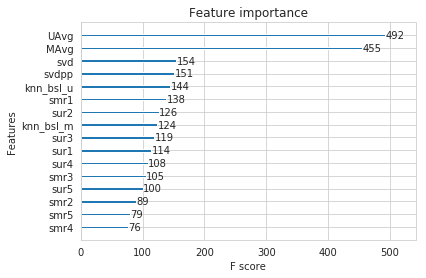

In [63]:
xgb_final = xgb.XGBRegressor(n_estimators=150,max_depth=5)
train_results, test_results = run_xgboost(gb_final, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_final'] = train_results
models_evaluation_test['xgb_final'] = test_results


xgb.plot_importance(xgb_final)
plt.show()

In [147]:
# prepare train data
x_train = reg_train[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_train = reg_train['rating']

# test data
x_test = reg_test_df[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_test = reg_test_df['rating']


import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
hyper_parameter = {"max_depth":[1,5,10,20], "n_estimators":[40, 80, 150,200]}
firstxgb=xgb.XGBRegressor()
best_parameter = RandomizedSearchCV(firstxgb, hyper_parameter, scoring = "neg_mean_absolute_error", cv = 3)
best_parameter.fit(x_train,y_train)
estimators = best_parameter.best_params_["n_estimators"]
depth = best_parameter.best_params_["max_depth"]
print(best_parameter.best_params_)




{'n_estimators': 80, 'max_depth': 5}


Evaluating the model with TRAIN data...
Evaluating Test data
[3.5575871 3.5575871 3.5575871 ... 3.5575871 3.5575871 3.5575871]
[4 3 4 ... 3 3 3]

TEST DATA
------------------------------
RMSE :  1.0877042279509206
MAPE :  35.45806501393537


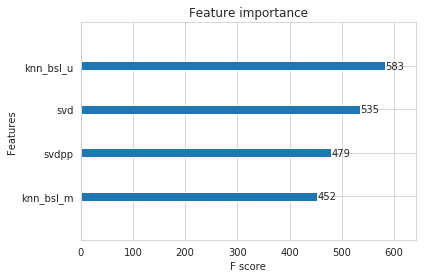

In [148]:
xgb_all_models = xgb.XGBRegressor(n_estimators=80,max_depth=5)
train_results, test_results = run_xgboost(xgb_all_models, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_all_models'] = train_results
models_evaluation_test['xgb_all_models'] = test_results

xgb.plot_importance(xgb_all_models)
plt.show()

In [58]:
data=[['xgboost with initial 13 features',1.096,32.6],['surprise baseline model',1.084,35],['xgboost with 13features+baseline',1.092,32.6],['surprisemodel with knn user user similarity',1.085,35.4],['surprise model with knn itemitem similartiy',1.085,35.4],['xgboost with added knn features',1.087,32.7],['surprise on svd',1.084,35.4],['surprise on svdpp',1.084,35.4],['xgboost on total features',1.09,32.6],['xgboost only on svd+knn features',1.08,35.4] ]
pd.DataFrame(data,columns=['model','rmse','mape'])

,model,rmse,mape
0,xgboost with initial 13 features,1.096,32.6
1,surprise baseline model,1.084,35.0
2,xgboost with 13features+baseline,1.092,32.6
3,surprisemodel with knn user user similarity,1.085,35.4
4,surprise model with knn itemitem similartiy,1.085,35.4
5,xgboost with added knn features,1.087,32.7
6,surprise on svd,1.084,35.4
7,surprise on svdpp,1.084,35.4
8,xgboost on total features,1.090,32.6
9,xgboost only on svd+knn features,1.080,35.4


##DOCUMENTATION CONCLUSION AND KEYTAKEAWAYS
### IN THE NETFLIX MOVIE RECCOMENDATION ASSIGNMENT WE HAVE TAKE THE RAW DATA OF MOVIEID WITH USER,RATING GIVEN TO THAT PARTICULAR MOVIE AND DATE. WE HAVE ALSO THE DATA OF MOVIE ID WITH MOVIE NAMES.
###WE CONSIDER THE RMSE AND THE MAPE AS THE PERFORMANCE METRIC WE TRAIN THE REGRESSION MODELS AND THE USER-USER SIMILARITY IN THIS ASSIGNMENT.WE PERFORM THE PREPROCESSING AND FEATURE EXTRACTION. WE DO THE EXPLORATORY DATA ANAYSIS AFTER REMOVING THE DUPLICATESAND WE WILL VISUALISE HOW THE RATINGS ARE PRESENT FOR THE MOVIE.WE WILL VISUALISE THE RATING BASED ON THE RAINGS PROVIDED IN THE MOVIE.WE ALSO VISUALISE THE RATIGS GIVEN BY NUSER AND RATINGS GIVEN TO THE MOVIES.WE COMPUTED MOVIE MOVIE SIMILARITY MATRIX.
AND OBTAINED THE SIMILAR MOVIES BASED ON THE QUERY POINT.
AS A PART OF OUR MODELLING STRATEGY AFTER COMPUTING THE MOVIE MOVIE SIMILARITYAND OBTAINING THE MOVIES TO THE MOVIE THAT WE NEED AND GIVE AS THE QUERY POINT.
###THEN AS A PART OF STRATEGY WE USE SURPRISE MODELS WE USE THE  20000USERS AND 2000 MOVIES AS A PART OF TASK AND AS APART OF TASK2 WE PERFORM THE HYPERPARAMETER TUNING WITH THE XGBOOST REGRESSOR.
## WE MODELISE WITH VARIOUS STRATEGIES AND TAKE THE VARIOUS FEATURES AND USE MODELS THAT HOW THE FEATURES ARE PERFORMING AND CONTRBUTING TO THE MODEL TO DECREASE ITS RMSE VALUE.
## AS A PART OF MODELLING WE ALREADY HAVE 13 FEATURES THAT ARE THE SIMILAR USERS AND SIMILAR MOVIES. GLOBAL AVERAGE ,AVERAGE FROM SIUMILAR USERS AND AVERAGE OF SIMILAR MOVIE RATINGS.
###PART1 EWE HAVE APPLIED XGBOOST ION THE 13 FEATURES AND OBTAINED THE LOGLOSS OF 1.096 AND WE HAVE THE SURPRISE BASE LINE MODEL THE REDICTED VALUES TURNS OUT OT BE THE FEATURES AND THIS FEATURE WILL BW ADDED AND XGBOOST IS APPLIED OVER THE 13 FEATURES WITH ADDED THE BASE LINE MODEL FEATURE.LATER WE TRAIN THE MODEL WITH USER USER SIMILARITY AND THE MOVIE MOVIE SIMILARITY AND OBTAIN THE PREDICTED VLAUES AND ADD WIT THE ALRADY EXISTING VALUES AND APPLY XGBOOST OVER THIS MODELS WITH HYPERPARAMETER TUNING.AFTER APPLYING THE EACH MODEL WE IWLL SEE THE RMSE VALUE ANFD THE IMPORTANCE OF THE FEATURE THAT IS ADDED AND HOW THE FEATURE CONTRIBUTING TO THE MODEL.WE ALSO ADDE THE FEATURES OF SVD AND SVD PP AND CONSIDER THEIR PREDICTED VALUES AS FEATURES.
### THE KEYTAKEAWAY IS IF WE OSERVE THE VIUSLISATION OF THE FEATURE IMPORTANCES THE FEATURES THAT ARE GENRATED FROM THE SURPRISE MODELS ARE PERFORMING BETTER IN MOST CASES COMPARED TO THE MANY OF THE 13 FEATURES.SO THESE CONTRIBUTE FOR THE MODEL AND WE CAN CONSIDER THE MODEL WITH THE LOWEST RMSE VALUE AS THE BEST MODEL.
## IF WE OBSERVE THE FEATURE IMPORTANCES OF FINAL MODELL THE FEATURE IMPORTANCES ARE IN ORDER OF 
* USERAVERAGE
* MOVIE AVVERAGE
* SVD
* SVDPP
* KNN BASE LINE MODEL
* SIMILAR USERS 
### FROM THE ABOVE ORDER WE CAN UNDERSTAND HOW THESE SURPRISE MODELS ARE CONTRIBUTING.
